# Spectral Clustering on Desikan-Killiani Atlas

In this notebook we will perform repeated spectral clusterings in brain regions segmented into the DK atlas and save the label outputs.

## 0. Load libraries and data

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
connectivity_df = pd.read_csv('data/meanACS69_conn_fs_order.csv', index_col=0)
connectivity_df.head(3)

,ctx-lh-bankssts,ctx-lh-caudalanteriorcingulate,ctx-lh-caudalmiddlefrontal,ctx-lh-cuneus,ctx-lh-entorhinal,ctx-lh-fusiform,ctx-lh-inferiorparietal,ctx-lh-inferiortemporal,ctx-lh-isthmuscingulate,ctx-lh-lateraloccipital,...,Left-VentralDC/Hypothalamus,Right-Cerebellum-Cortex,Right-Thalamus-Proper,Right-Caudate,Right-Putamen,Right-Pallidum,Right-Hippocampus,Right-Amygdala,Right-Accumbens-area,Right-VentralDC/Hypothalamus
ctx-lh-bankssts,0.000000,0.000872,0.001662,0.005252,0.000414,1.799993,11.782650,2.694307,0.051261,0.416924,...,0.001412,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
ctx-lh-caudalanteriorcingulate,0.000872,0.000000,1.426488,0.000000,0.000000,0.000223,0.005237,0.000000,0.070452,0.000000,...,0.000273,0.0,0.003289,0.017004,0.001603,0.0,0.0,0.0,0.003859,0.0
ctx-lh-caudalmiddlefrontal,0.001662,1.426488,0.000000,0.000220,0.000000,0.000242,0.030775,0.000000,0.047305,0.000534,...,0.000000,0.0,0.000000,0.001258,0.000000,0.0,0.0,0.0,0.000000,0.0


This will be important later for glass brain plotting

In [112]:
from nilearn import plotting    # for plotting glass brains

def plot_glass_brain(color):
    df = pd.read_csv('data/dk_all.csv')

    # DK has 86 regions
    coords = [(df['x.mni'][i], df['y.mni'][i], df['z.mni'][i]) for i in range(86)]
    
    # Connections between the regions are required for plotting but they make
    # everything cluttered so let's just make an array of zeros:
    connec = np.array([[0]*86]*86)

    plotting.plot_connectome(connec, coords, node_color=color, node_size=100, display_mode='lyrz')

## 1. Calculate Spectral Clusters
### 1.1. Apply Gaussian filter to data

In [91]:
#we will invert the connectivity matrix (1/M) so lets get rid of zeros
connectivity_df = connectivity_df.replace(0.000000, 0.000001)

#similarity matrices are the inverted connectivity matrices
similarity_matrix = (1/ connectivity_df)

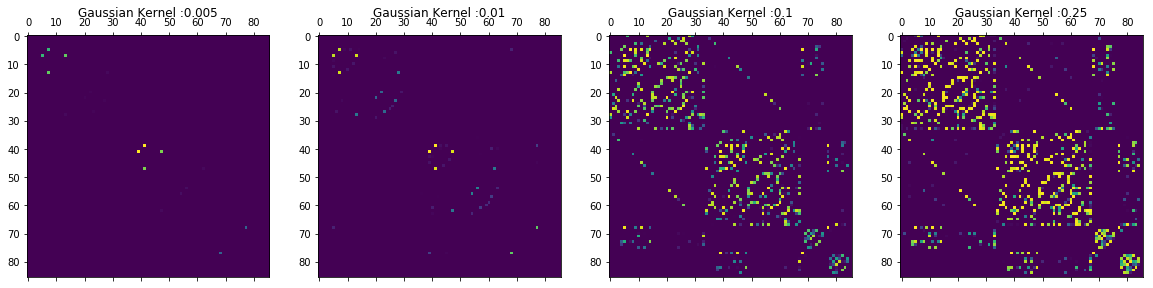

In [101]:
# let's use a gaussian filter (kernel) to smoothen the data
plt.figure(figsize=(20,20))
for i, gauss_parameter in enumerate([0.005,0.010, 0.100, 0.250]):
    kernelized_matrix = np.exp(- similarity_matrix ** 2 / (2. * gauss_parameter ** 2))
    plt.subplot(1,4,i+1)
    plt.title('Gaussian Kernel :'+str(gauss_parameter))
    plt.matshow(kernelized_matrix, fignum=False)

In [104]:
# let's choose one parameter for now:
gauss_parameter = 0.2
kernelized_matrix = np.exp(- similarity_matrix ** 2 / (2. * gauss_parameter ** 2))

### 1.2 Run spectral clustering

In [103]:
from sklearn.cluster import SpectralClustering

In [110]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

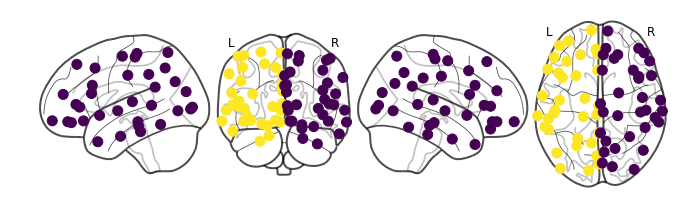

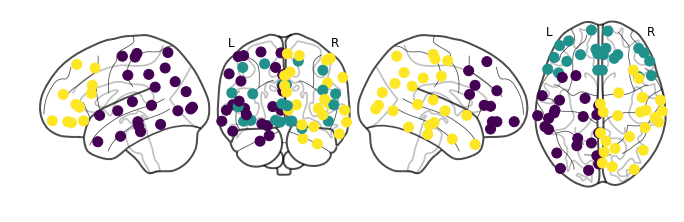

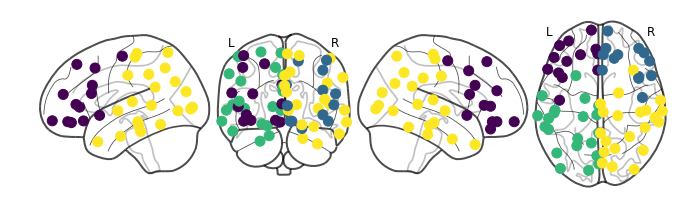

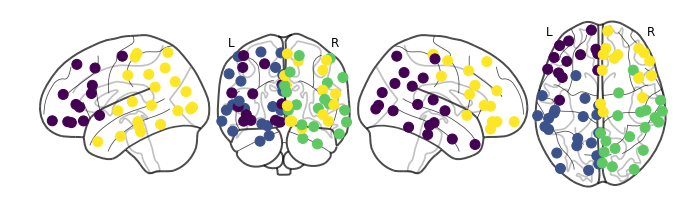

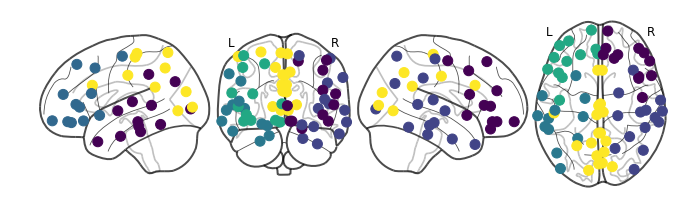

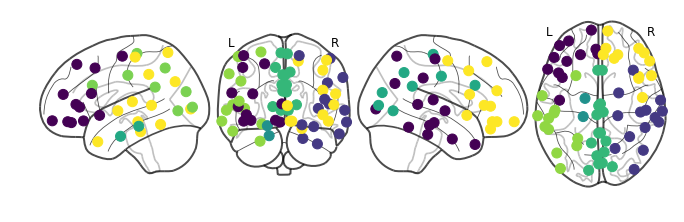

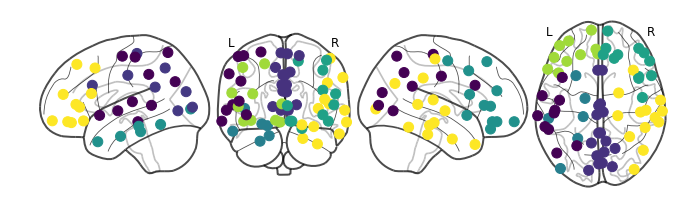

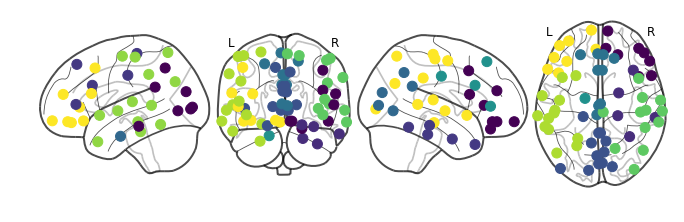

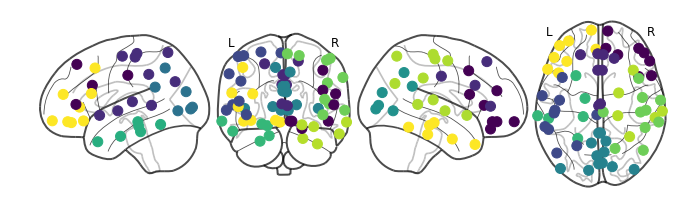

In [113]:
cluster_sizes = [2,3,4,5,6,7,8,9,10]
labels = {}
for cluster_size in cluster_sizes:
    spectral   = SpectralClustering(n_clusters=cluster_size, affinity='precomputed')
    spectral.fit(kernelized_matrix)
    labels.update({cluster_size:spectral.labels_}) 
    plot_glass_brain(color=labels[cluster_size])

### Export data to csv file

In [122]:
labels_df = pd.DataFrame(labels, index=connectivity_df.index)
labels_df.to_csv('data/dk_clustering_labels.csv')
labels_df.head()

,2,3,4,5,6,7,8,9,10
ctx-lh-bankssts,1,0,2,1,2,5,0,7,2
ctx-lh-caudalanteriorcingulate,1,1,0,0,5,4,1,3,1
ctx-lh-caudalmiddlefrontal,1,1,0,0,3,0,6,8,9
ctx-lh-cuneus,1,0,2,1,5,4,1,2,4
ctx-lh-entorhinal,1,0,2,1,2,3,3,4,6
